In [85]:
import sys
import pathlib

root = str(pathlib.Path().cwd().parent)
if root not in sys.path:
    sys.path.append(root)

In [86]:
import io
import math
import os
import random

import atproto
import dotenv
import numpy as np

from generators import RGBGenerator, HSVGenerator, CIELChGenerator
from generators.palettes import (
    GradientPalette,
    SinglePalette,
    RandomPalette,
    ComplementaryPalette,
    AnalogousPalette,
    TriadicPalette
)
from layers.frames import SingleFrame, HorizontalFrame, VerticalFrame, TwoByTwoFrame

dotenv.load_dotenv()

True

In [87]:
USERNAME = os.getenv('ATPROTO_CLIENT_USERNAME')
PASSWORD = os.getenv('ATPROTO_CLIENT_PASSWORD')

In [88]:
generator = CIELChGenerator()
options = {
    1: {
        'frames': [SingleFrame((1200, 1200))],
        'palettes': [RandomPalette]
    },
    2: {
        'frames': [HorizontalFrame((600, 1200)), VerticalFrame((1200, 600))],
        'palettes': [RandomPalette, ComplementaryPalette]
    },
    3: {
        'frames': [HorizontalFrame((600, 1800)), VerticalFrame((1800, 600))],
        'palettes': [RandomPalette, GradientPalette, AnalogousPalette, TriadicPalette]
    },
    4: {
        'frames': [HorizontalFrame((600, 2400)), VerticalFrame((2400, 600)), TwoByTwoFrame((800, 800))],
        'palettes': [RandomPalette, GradientPalette]
    },
}

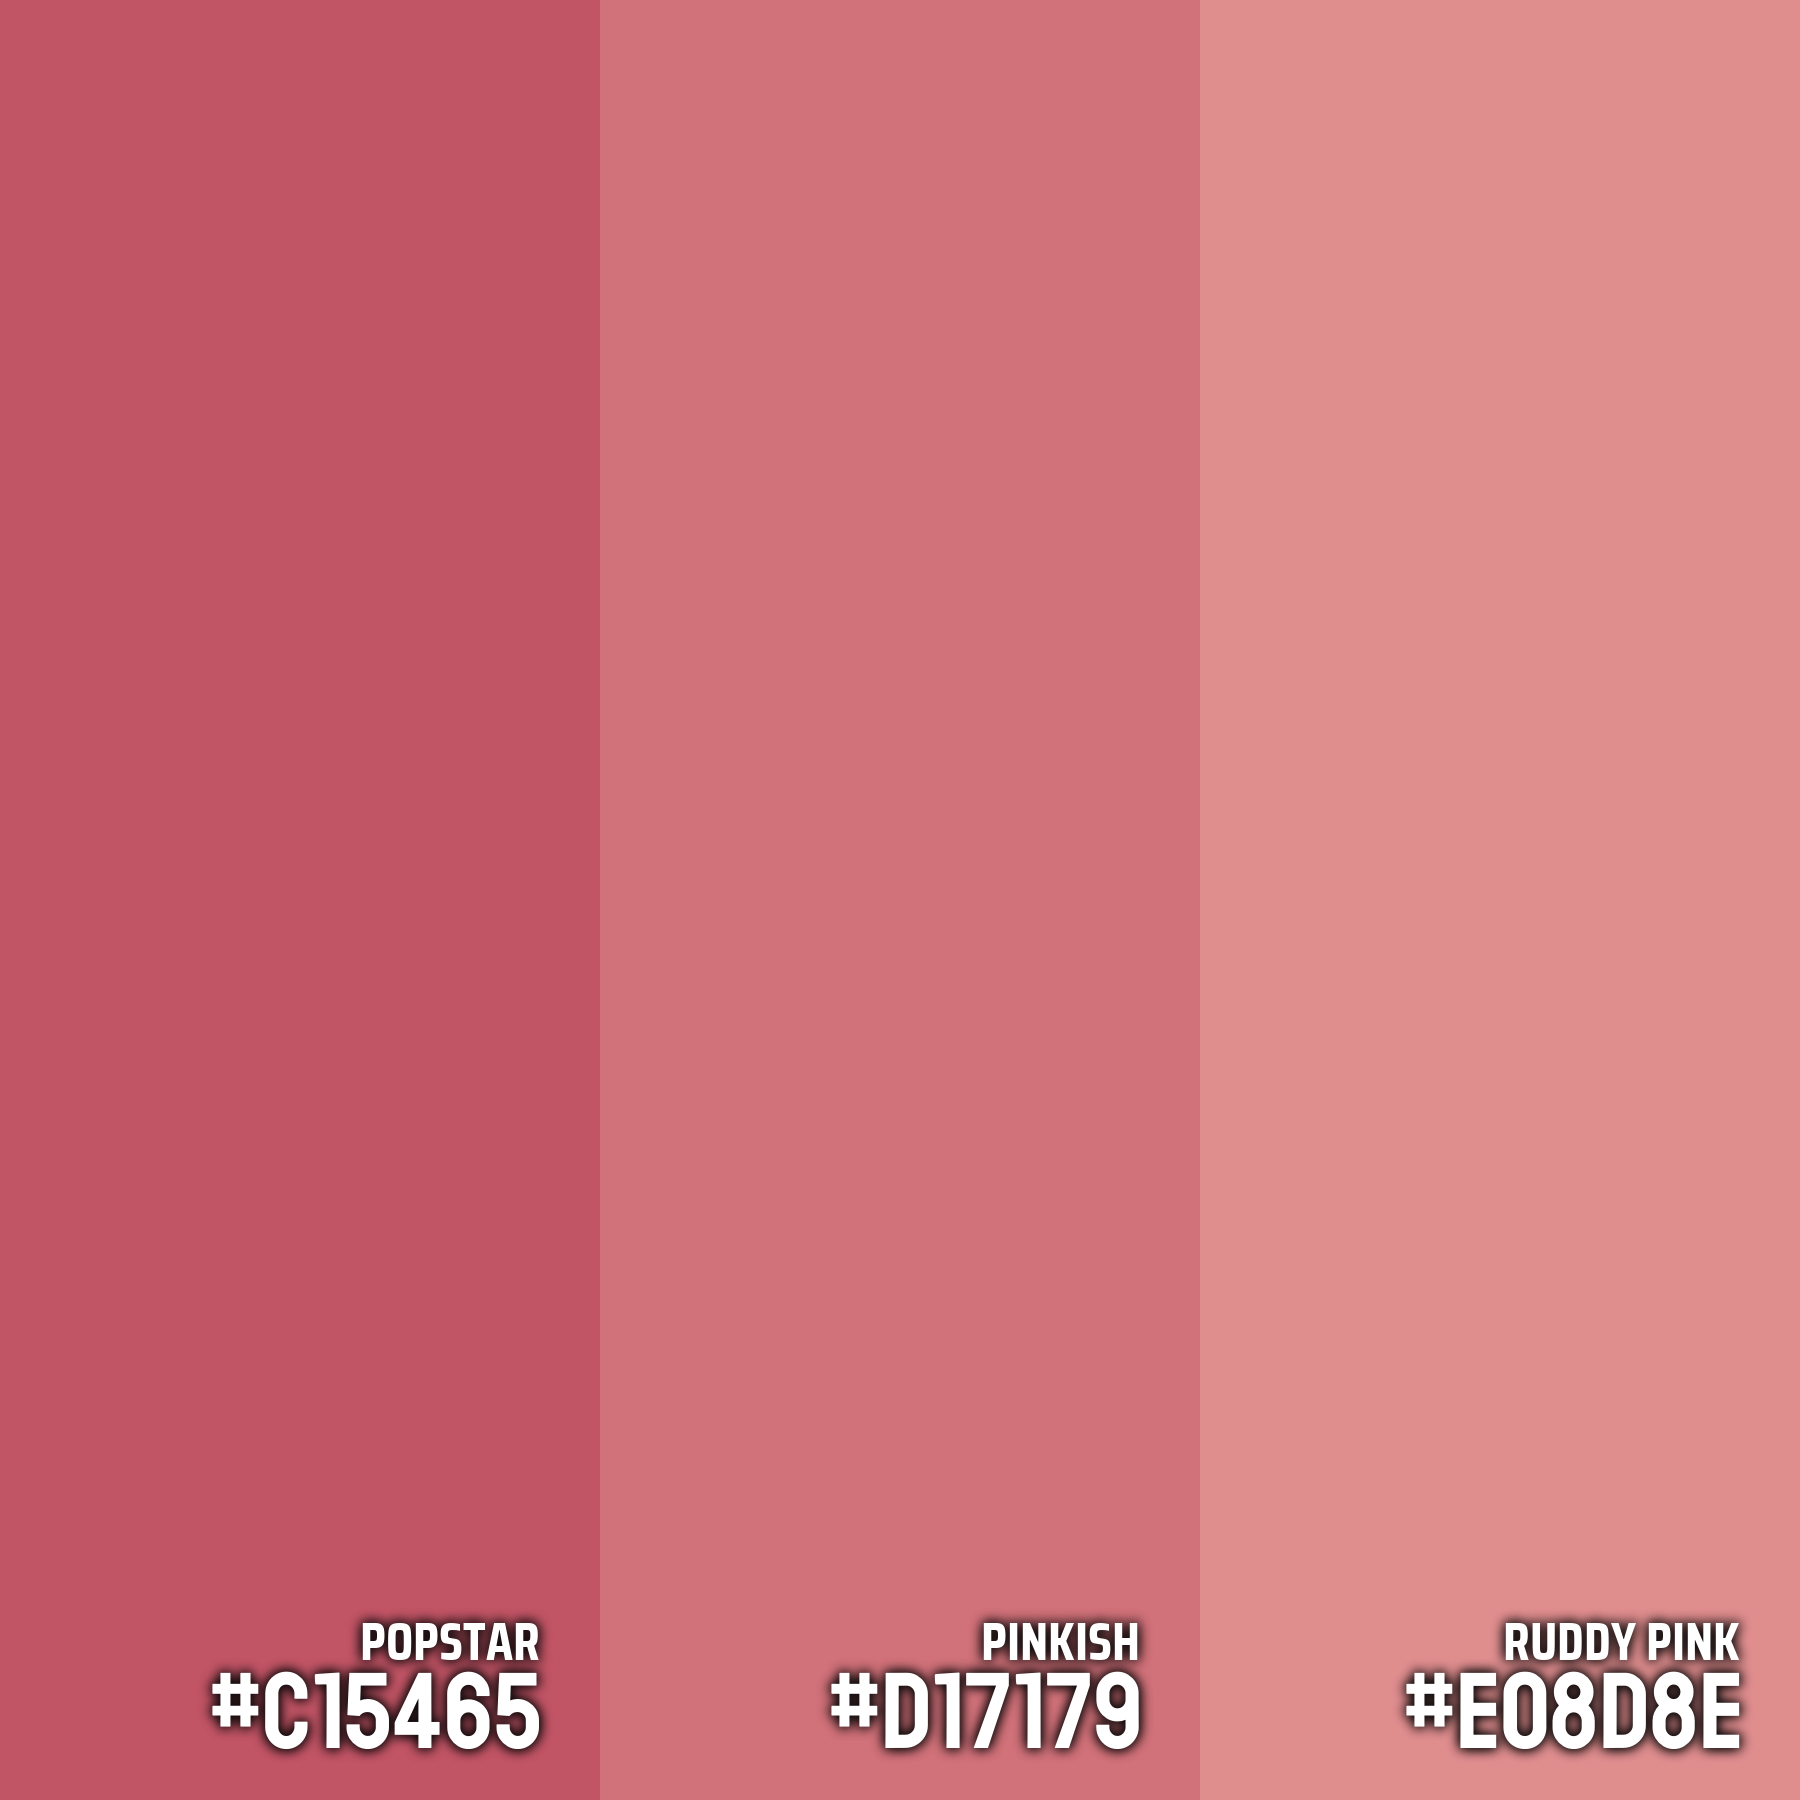

In [ ]:
n = np.random.choice(
    [1, 2, 3, 4],
    p=[0.25, 0.25, 0.25, 0.25]
)
frame = random.choice(options[n]['frames'])
palette = random.choice(options[n]['palettes'])
colours = palette(generator).generate(n)

image = frame.construct_frame(colours)
image

In [90]:
buffer = io.BytesIO()
image.save(buffer, format="PNG")

In [ ]:
client = atproto.Client()
client.login(USERNAME, PASSWORD)

alt_text = f"A picture of the following colors: {str([colour.name for colour in colours])}. Their hex codes are {str([colour.hexcode for colour in colours])}."

client.send_image("TEST POST", image=buffer.getvalue(), image_alt = alt_text)

CreateRecordResponse(uri='at://did:plc:lk63sepwkbzg6cm67ws7ihq4/app.bsky.feed.post/3melcfktaqn2e', cid='bafyreifmvkwpn254aadii6xdjelo5htkvq4lm3cbhepjnyzfaisgzo5jw4')